In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as pl
import rate_model as rm
import ipywidgets as ipw
from rate_model.params import *
from tqdm import tqdm_notebook

In [2]:
# params = params_dict_Tsodyks.copy()

In [3]:
params = params_dict_burst.copy()

In [4]:
params = params_dict_stationary.copy()

In [5]:
# bursting
params_updated = {
    'eps': 0.0,
    'J0': -12.,
    'I0': 5.0,
}
# params.update(params_updated)

In [6]:
# stationary
params_updated = {
    'eps': 0.0,
    'J0': -18.,
    'I0': 7.0,
}
# params.update(params_updated)

In [7]:
sim_params = {
    'sim_time': 75.,
    'dt': 0.001,
    'sampl_dt': 0.001,
    'N': 90
}

In [8]:
noise_params = {
    'D': .5,
    'tau_n': 0.1,
    'seed': 0
}

In [9]:
stim = {
    'stim_start': [.0],
    'stim_duration': [.05],
    'stim_ampl': [70.0],
    'stim_pos': [0.0], 
    'stim_width': [0.5],
    'stim_type': ['gauss']
}

In [10]:
stim = stim_stationary.copy()

In [11]:
# stim = stim_burst.copy()

In [12]:
num_samples = 32

In [13]:
def calc_diffusion(params, stim, noise_params, num_samples):
    rate_network = rm.RateNetwork.init_all_params(**params)

    u_traces = np.zeros((num_samples, len(rate_network.tm) - 2))
    rate_traces = np.zeros((num_samples, len(rate_network.tm) - 2))
    
    for i in tqdm_notebook(range(num_samples)):
#         params.update({'seed': i, 'eps': 0.5})
#         rate_network = rm.RateNetwork.init_all_params(**params)

        rate_network.set_initial_values()
        rate_network.set_stimuli(**stim)
        
        noise_params.update({'seed': i})
        rate_network.set_noise_params(**noise_params)
        
        rate_network.simulate_facil(backend = 'c')
        u_traces[i] = np.degrees(rate_network.get_angle(rate_network.ActU))[2:]
        rate_traces[i] = np.degrees(rate_network.get_angle(rate_network.ActRE))[2:]
    return rate_network.tm[2:], u_traces, rate_traces

In [14]:
params.update(sim_params)
tm, u_traces, rate_traces = calc_diffusion(params, stim, noise_params, num_samples=num_samples)

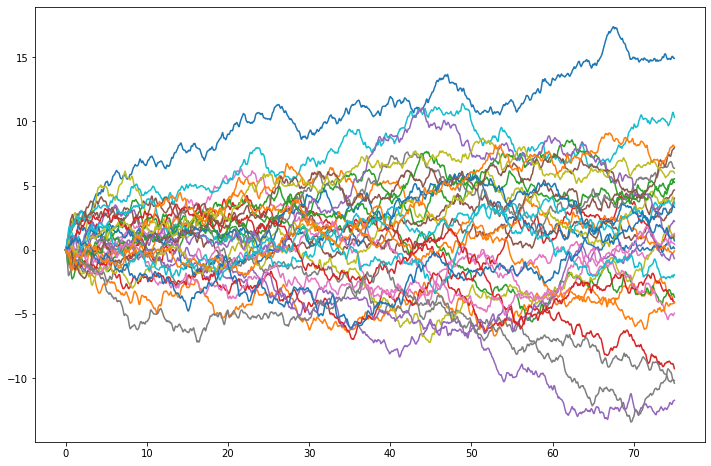

In [15]:
pl.figure(figsize=(12, 8))
pl.plot(tm, u_traces.T);

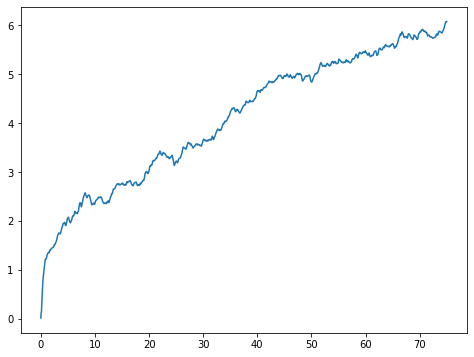

In [16]:
pl.figure(figsize=(8, 6))
pl.plot(tm, np.std(u_traces, axis=0));